# IMPORT

In [1089]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATA

In [1090]:
df = pd.read_csv('/home/rovik/Dropbox/Studie/IBE405 Cyber-physical Systems and Smart Cities/ibe405-project/rawData.csv')
df2 = pd.read_json('/home/rovik/Dropbox/Studie/IBE405 Cyber-physical Systems and Smart Cities/ibe405-project/weatherdata_11.11.21.json')

# PREPARE DATASET

## Arduino Data

In [1091]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,time,temperature,humidity,luminosity
0,2021-11-04,18:00:00,21.5,34.1,very bright
1,2021-11-04,18:00:00,21.5,17.5,very bright
2,2021-11-04,18:00:00,21.5,35.6,very bright
3,2021-11-04,18:00:00,21.6,35.2,very bright
4,2021-11-04,18:00:00,21.6,34.6,very bright


In [1092]:
df.describe()

,temperature,humidity
count,4249.000000,4249.000000
mean,21.026194,35.560861
std,0.368707,3.243556
min,20.100000,17.500000
25%,20.700000,33.800000
50%,21.100000,36.500000
75%,21.300000,37.600000
max,21.800000,43.200000


In [1093]:
df.isna().sum()

date           0
time           0
temperature    0
humidity       0
luminosity     1
dtype: int64

Since there is only 1 NaN value in our categorical data readings and the API weather data only has 1 reading per hour, we simply drop this value as it will have little impact on the whole.

In [1094]:
df.dropna(axis=0, inplace=True)

-----

## API Weather Data

In [1095]:
df2.head()

,_id,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,cloud_area_fraction_high,cloud_area_fraction_low,cloud_area_fraction_medium,dew_point_temperature,fog_area_fraction,relative_humidity,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90,time,date
0,2021-11-03T14:00:00Z,1001.5,8.4,7.6,9.1,0.0,0.0,0.0,0.0,3.1,0.0,70.1,0.1,53.5,0.9,1.9,0.5,1.0,14:00:00,2021-11-03
1,2021-11-03T15:00:00Z,1001.8,7.3,6.4,8.1,0.0,0.0,0.0,0.0,2.7,0.0,73.1,0.0,14.2,1.5,2.1,1.3,1.8,15:00:00,2021-11-03
2,2021-11-03T16:00:00Z,1002.1,6.5,5.5,7.3,0.0,0.0,0.0,0.0,1.9,0.0,73.5,0.0,42.5,1.9,2.6,1.3,2.2,16:00:00,2021-11-03
3,2021-11-03T17:00:00Z,1002.7,6.0,5.0,6.9,0.0,0.0,0.0,0.0,2.2,0.0,77.6,0.0,39.7,1.9,2.7,1.1,2.4,17:00:00,2021-11-03
4,2021-11-03T18:00:00Z,1003.2,5.5,4.7,6.3,0.1,0.0,0.1,0.0,2.3,0.0,80.6,0.0,42.2,2.4,3.6,1.4,2.4,18:00:00,2021-11-03


In [1096]:
df2.describe()

,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,cloud_area_fraction_high,cloud_area_fraction_low,cloud_area_fraction_medium,dew_point_temperature,fog_area_fraction,relative_humidity,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,1005.492147,5.355497,4.590576,6.096335,70.751832,33.819895,41.534031,37.697906,0.970157,0.001047,75.147120,0.050785,166.170157,4.835602,8.073298,3.760209,5.462827
std,4.717570,2.053331,2.023628,2.054222,35.280659,42.171367,38.803540,38.624499,4.100192,0.014471,13.363114,0.094518,114.014943,2.986247,4.778710,2.510732,3.072087
min,993.400000,0.000000,-0.800000,0.800000,0.000000,0.000000,0.000000,0.000000,-9.300000,0.000000,43.300000,0.000000,2.200000,0.400000,1.400000,0.200000,0.800000
25%,1003.600000,4.000000,3.300000,4.800000,50.650000,0.000000,0.000000,0.000000,-1.800000,0.000000,67.050000,0.000000,40.900000,2.200000,3.700000,1.750000,2.750000
50%,1005.300000,5.400000,4.700000,6.100000,89.600000,1.600000,35.500000,18.800000,2.300000,0.000000,77.600000,0.000000,226.500000,4.500000,7.500000,3.400000,5.100000
75%,1008.200000,6.650000,5.800000,7.400000,98.400000,83.200000,81.700000,73.600000,3.700000,0.000000,87.000000,0.100000,253.300000,6.500000,10.850000,5.250000,7.300000
max,1015.600000,10.100000,9.300000,10.800000,100.000000,100.000000,99.300000,100.000000,7.400000,0.200000,95.800000,0.300000,359.800000,13.600000,21.400000,11.500000,13.600000


In [1097]:
df2.drop(["_id"], axis=1, inplace=True)
df2.isna().sum()

air_pressure_at_sea_level        0
air_temperature                  0
air_temperature_percentile_10    0
air_temperature_percentile_90    0
cloud_area_fraction              0
cloud_area_fraction_high         0
cloud_area_fraction_low          0
cloud_area_fraction_medium       0
dew_point_temperature            0
fog_area_fraction                0
relative_humidity                0
ultraviolet_index_clear_sky      0
wind_from_direction              0
wind_speed                       0
wind_speed_of_gust               0
wind_speed_percentile_10         0
wind_speed_percentile_90         0
time                             0
date                             0
dtype: int64

# Merge Datasets

In [1098]:
df.drop_duplicates(subset=["date", "time"], keep="last", inplace=True)

In [1099]:
merged_df = df.merge(df2)
merged_df

,date,time,temperature,humidity,luminosity,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,...,cloud_area_fraction_medium,dew_point_temperature,fog_area_fraction,relative_humidity,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90
0,2021-11-04,18:00:00,21.3,33.8,pitch black,1008.7,4.4,3.6,5.1,93.9,...,47.2,3.7,0.0,95.7,0.0,344.6,1.0,1.7,0.5,1.8
1,2021-11-04,19:00:00,21.1,34.9,bright,1008.5,3.6,3.0,4.5,59.6,...,42.7,2.2,0.0,91.1,0.0,317.3,1.0,2.0,0.6,1.7
2,2021-11-04,20:00:00,21.3,35.4,pitch black,1008.2,5.0,4.4,5.8,97.2,...,67.4,3.1,0.0,88.2,0.0,263.8,1.0,1.8,1.0,2.6
3,2021-11-04,21:00:00,21.4,36.9,pitch black,1008.1,5.2,4.4,6.0,100.0,...,89.0,3.4,0.0,89.1,0.0,246.0,2.1,3.2,1.9,2.8
4,2021-11-04,22:00:00,21.5,35.7,bright,1008.3,6.3,5.4,6.9,99.0,...,86.6,4.2,0.0,87.1,0.0,254.3,4.0,6.0,2.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2021-11-10,10:00:00,20.3,37.5,bright,1005.7,6.4,5.6,7.1,73.3,...,58.8,3.9,0.0,84.5,0.2,235.9,9.0,15.3,7.9,11.3
74,2021-11-10,11:00:00,20.8,36.3,dark,1006.2,6.3,5.6,7.1,97.8,...,88.3,4.2,0.0,87.2,0.2,234.2,11.0,16.5,9.3,11.5
75,2021-11-10,12:00:00,20.8,37.0,very bright,1006.4,7.3,6.4,8.0,88.4,...,68.3,4.9,0.0,85.3,0.2,241.6,10.2,19.2,8.2,12.4
76,2021-11-10,13:00:00,20.7,36.1,very bright,1006.8,7.8,7.0,8.6,67.8,...,49.7,4.1,0.0,77.5,0.1,247.3,13.6,21.2,10.4,13.6


# PREPROCESSING THE DATA

## Split Numerical and Categorical

In [1100]:
df_num = merged_df.select_dtypes(include=[np.number])
df_cat = merged_df.select_dtypes(exclude=[np.number])

## Feature Engineering

In [1101]:
df_cat.drop(["date", "time"], axis=1, inplace=True)

/home/rovik/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


There hasn't been any instance of fog during the time period.

In [1102]:
df_num.drop(["fog_area_fraction"], axis=1, inplace=True)

## Imputation

No missing values

## Vectorization

In [1103]:
df_cat = pd.get_dummies(df_cat, columns=["luminosity"], prefix=["luminosity"])
df_cat

,luminosity_bright,luminosity_dark,luminosity_pitch black,luminosity_very bright
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
73,1,0,0,0
74,0,1,0,0
75,0,0,0,1
76,0,0,0,1


## Merge

In [1104]:
df = df_num.join(df_cat)
df

,temperature,humidity,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,cloud_area_fraction_high,cloud_area_fraction_low,cloud_area_fraction_medium,...,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90,luminosity_bright,luminosity_dark,luminosity_pitch black,luminosity_very bright
0,21.3,33.8,1008.7,4.4,3.6,5.1,93.9,80.4,35.5,47.2,...,0.0,344.6,1.0,1.7,0.5,1.8,0,0,1,0
1,21.1,34.9,1008.5,3.6,3.0,4.5,59.6,9.5,42.0,42.7,...,0.0,317.3,1.0,2.0,0.6,1.7,1,0,0,0
2,21.3,35.4,1008.2,5.0,4.4,5.8,97.2,95.5,67.2,67.4,...,0.0,263.8,1.0,1.8,1.0,2.6,0,0,1,0
3,21.4,36.9,1008.1,5.2,4.4,6.0,100.0,85.3,97.7,89.0,...,0.0,246.0,2.1,3.2,1.9,2.8,0,0,1,0
4,21.5,35.7,1008.3,6.3,5.4,6.9,99.0,21.9,90.8,86.6,...,0.0,254.3,4.0,6.0,2.3,4.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,20.3,37.5,1005.7,6.4,5.6,7.1,73.3,0.1,60.4,58.8,...,0.2,235.9,9.0,15.3,7.9,11.3,1,0,0,0
74,20.8,36.3,1006.2,6.3,5.6,7.1,97.8,3.6,79.3,88.3,...,0.2,234.2,11.0,16.5,9.3,11.5,0,1,0,0
75,20.8,37.0,1006.4,7.3,6.4,8.0,88.4,0.3,77.2,68.3,...,0.2,241.6,10.2,19.2,8.2,12.4,0,0,0,1
76,20.7,36.1,1006.8,7.8,7.0,8.6,67.8,0.0,62.7,49.7,...,0.1,247.3,13.6,21.2,10.4,13.6,0,0,0,1


## Normalization

In [1105]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

scaler = MaxAbsScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df))
norm_df.columns = df.columns
norm_df.index = df.index
norm_df

,temperature,humidity,air_pressure_at_sea_level,air_temperature,air_temperature_percentile_10,air_temperature_percentile_90,cloud_area_fraction,cloud_area_fraction_high,cloud_area_fraction_low,cloud_area_fraction_medium,...,ultraviolet_index_clear_sky,wind_from_direction,wind_speed,wind_speed_of_gust,wind_speed_percentile_10,wind_speed_percentile_90,luminosity_bright,luminosity_dark,luminosity_pitch black,luminosity_very bright
0,0.981567,0.804762,0.993206,0.435644,0.387097,0.472222,0.939,0.804,0.359676,0.472,...,0.000000,0.963108,0.073529,0.079439,0.044248,0.132353,0.0,0.0,1.0,0.0
1,0.972350,0.830952,0.993009,0.356436,0.322581,0.416667,0.596,0.095,0.425532,0.427,...,0.000000,0.886808,0.073529,0.093458,0.053097,0.125000,1.0,0.0,0.0,0.0
2,0.981567,0.842857,0.992714,0.495050,0.473118,0.537037,0.972,0.955,0.680851,0.674,...,0.000000,0.737283,0.073529,0.084112,0.088496,0.191176,0.0,0.0,1.0,0.0
3,0.986175,0.878571,0.992615,0.514851,0.473118,0.555556,1.000,0.853,0.989868,0.890,...,0.000000,0.687535,0.154412,0.149533,0.168142,0.205882,0.0,0.0,1.0,0.0
4,0.990783,0.850000,0.992812,0.623762,0.580645,0.638889,0.990,0.219,0.919959,0.866,...,0.000000,0.710732,0.294118,0.280374,0.203540,0.294118,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.935484,0.892857,0.990252,0.633663,0.602151,0.657407,0.733,0.001,0.611955,0.588,...,0.666667,0.659307,0.661765,0.714953,0.699115,0.830882,1.0,0.0,0.0,0.0
74,0.958525,0.864286,0.990744,0.623762,0.602151,0.657407,0.978,0.036,0.803445,0.883,...,0.666667,0.654556,0.808824,0.771028,0.823009,0.845588,0.0,1.0,0.0,0.0
75,0.958525,0.880952,0.990941,0.722772,0.688172,0.740741,0.884,0.003,0.782168,0.683,...,0.666667,0.675238,0.750000,0.897196,0.725664,0.911765,0.0,0.0,0.0,1.0
76,0.953917,0.859524,0.991335,0.772277,0.752688,0.796296,0.678,0.000,0.635258,0.497,...,0.333333,0.691168,1.000000,0.990654,0.920354,1.000000,0.0,0.0,0.0,1.0


## Correlation

In [1106]:
norm_df.drop(["air_temperature_percentile_10", "air_temperature_percentile_90", "wind_speed_percentile_10", "wind_speed_percentile_90"], axis=1, inplace=True)

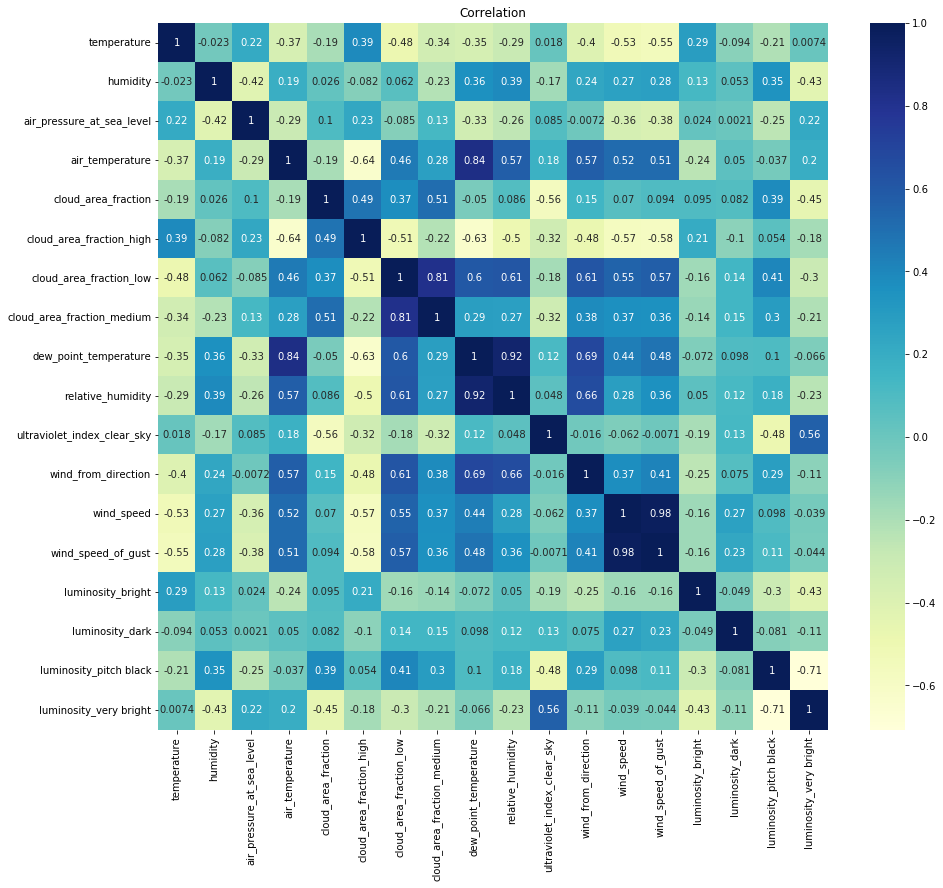

In [1146]:
plt.figure(figsize=(15,13))
plt.title('Correlation')
ax = sns.heatmap(norm_df.corr(), vmax=1.0, annot=True, cmap="YlGnBu")
plt.show()

# X and y

In [1108]:
y = norm_df["temperature"]
X = norm_df.drop(["temperature"], axis=1)

In [1109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

## Pairplot

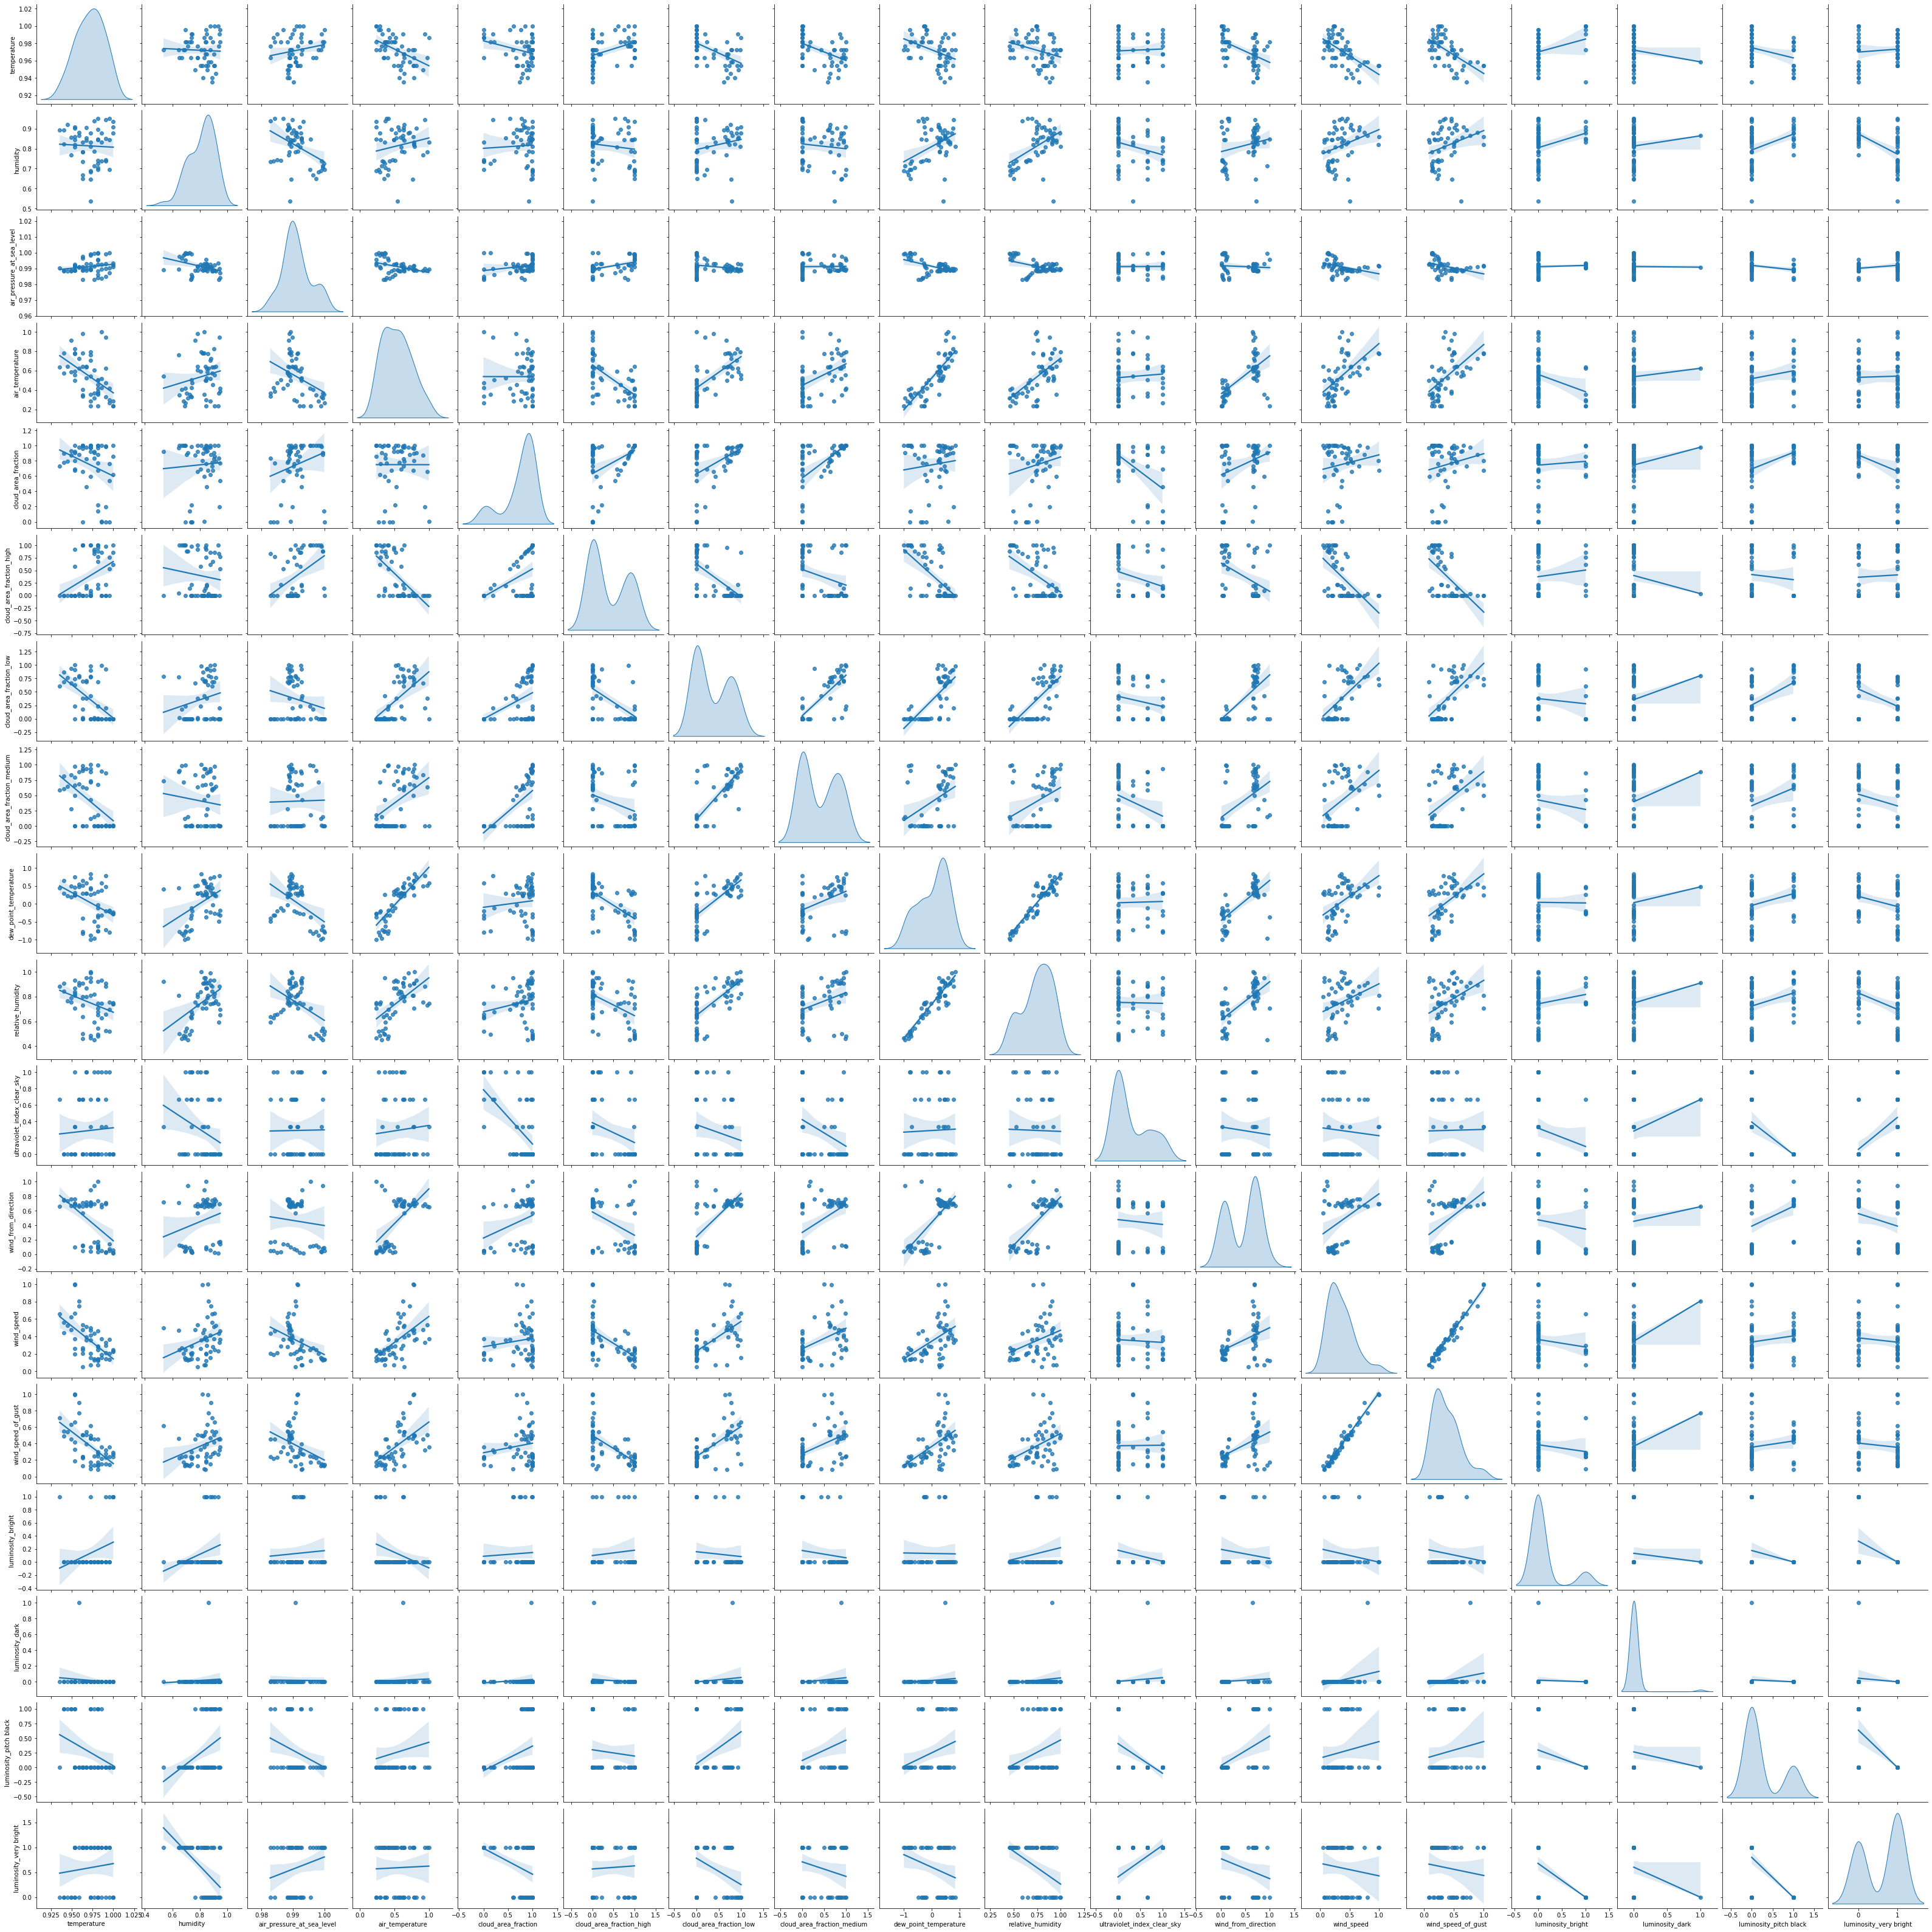

In [1110]:
# train_dataset = X_train.copy()
# train_dataset.insert(0, "temperature", y_train)
# sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

## Define and Implement Model

In [1111]:
from sklearn.linear_model import LogisticRegression, LinearRegression

regressor = LinearRegression()

## Train the Model

In [1112]:
regressor.fit(X_train, y_train)
regressor.coef_

array([ 2.53552983e-02,  7.06864109e-01, -1.41462078e-01, -3.77096554e-02,
        2.15625319e-02,  3.02790192e-02, -2.78491138e-03,  1.30741665e-01,
       -3.09967563e-01, -1.62489472e-02, -1.16208132e-02, -1.43763824e-01,
        1.07938476e-01, -6.36575448e-04,  1.99788137e-02, -1.55556466e-02,
       -3.78659168e-03])